Figure S1  

Beep Accuracy

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
def get_subject_ids():
    # Get unique subject IDs
    subject_ids = set()
    for filename in os.listdir('csv/'):
        if filename.startswith('SV2') and filename.endswith('_beep.csv'):
            parts = filename.split('_')     
            subject_ids.add(parts[0])
            
    return sorted(list(subject_ids))

In [3]:
subject_ids = get_subject_ids()

all_dfs = []
for sid in subject_ids:
    fpath = f"csv/{sid}_beep.csv"
    df = pd.read_csv(fpath)
    all_dfs.append(df)
beep_df = pd.concat(all_dfs, ignore_index=True)
beep_df['condition'] = 'F' + beep_df['n_flash'].astype(int).astype(str) + 'B' + beep_df['n_beep'].astype(int).astype(str)

accuracy_df = (
    beep_df
    .groupby(['n_flash', 'n_beep'], observed=True)['accuracy']
    .mean()
    .reset_index()
)

heatmap_data = accuracy_df.pivot(
    index='n_flash',
    columns='n_beep',
    values='accuracy'
)

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

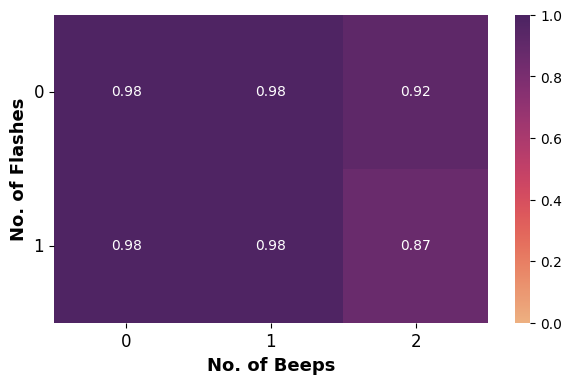

In [4]:
plt.figure(figsize=(7, 4))
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap='flare',
    cbar=True,
    vmin=0, vmax=1
)
fontsize=13
# plt.title(f"Mean Accuracy of Perceiving Beeps (N={len(subject_ids)})", fontsize=fontsize, fontweight='bold')
plt.xlabel('No. of Beeps', fontsize=fontsize, fontweight='bold')
plt.ylabel('No. of Flashes', fontsize=fontsize, fontweight='bold')

ax.set_xticklabels([int(b) for b in heatmap_data.columns], fontsize=fontsize-1)
ax.set_yticklabels([int(f) for f in heatmap_data.index], fontsize=fontsize-1, rotation=0)